In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment_app(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=2000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp6', T=T)
    exp_MAB_1.segments_means(param1=2,param2=8)
    df1, df2 = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df1, df2

In [3]:
#changeable parameters
np.random.seed(777)
price_list=np.linspace(0.01,1,20)
T = 600

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 10
exp_MAB_1, df1, df2 = set_experiment_app(price_list=price_list, segments=segments, update_freq =update_freq, T=T)

The true optimal arm in first 300 rounds is: 4
The true optimal arm in the rest is: 12
time: 26.404364109039307


In [4]:
T = 305

In [90]:
exp_MAB_1.t

500

In [6]:
IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=1)
IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
exp_MAB_1.t = 0

Reward change detected at time: 302
Detected Sign: 1
eg triggered at  302
arm
1.0     3.000187e-01
4.0     5.673759e-04
6.0     1.811375e-03
7.0     2.090868e-03
11.0    2.975562e-07
14.0    1.814087e-02
17.0    8.933317e-06
Name: pvalue, dtype: float64
demand shape does not match


In [7]:
IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=1)
IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
exp_MAB_1.t = T

Reward change detected at time: 304
Detected Sign: -1
eg triggered at  304
arm
1.0     1.338470e-01
4.0     2.279851e-03
5.0     7.738361e-04
7.0     1.199975e-04
11.0    1.101111e-04
14.0    3.006665e-06
17.0    8.178081e-07
Name: pvalue, dtype: float64
demand shape does not match


349

In [87]:
IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=500, pricing_MAB=exp_MAB_1, mode='mode2',
                                                                     update_style='none', base=1000, p=IDS_1.p,
                                                                     p_y=IDS_1.p_y, R=IDS_1.R)
exp_MAB_1.t = 355
IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=500, pricing_MAB=exp_MAB_1, mode='mode2',
                                                                     update_style='none', base=1000, p=IDST_1.p,
                                                                     p_y=IDST_1.p_y, R=IDST_1.R)

Reward change detected at time: 482
Detected Sign: -1
eg triggered at  487
arm
1.0     0.000001
4.0     0.165965
7.0     0.677070
11.0    1.000000
12.0    1.000000
14.0    1.000000
17.0    0.514328
Name: pvalue, dtype: float64
demand shape does not match


<AxesSubplot:>

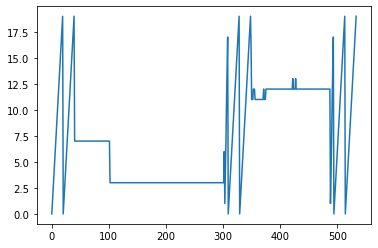

In [88]:
sns.lineplot(data=IDS_1_arm)

<AxesSubplot:>

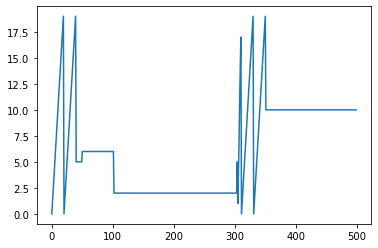

In [89]:
sns.lineplot(data=IDST_1_arm)

In [79]:
t = 349
lamb = 1

In [80]:
print('p(a_star)')
print(IDS_1.get_pa_star().round(2))
print(np.argsort(IDS_1.get_pa_star())[::-1])
print('\nposterior')
print(IDS_1.all_posterior[t].round(2))
print('\ndelta')
print(np.array(IDS_1.IDS_results['delta'][t]).round(2))
print(np.argsort(np.array(IDS_1.IDS_results['delta'][t])))
print('\ninfo gain')
print(np.array(IDS_1.IDS_results['g'][t]).round(2))
print(np.argsort(np.array(IDS_1.IDS_results['g'][t]))[::-1])
print('\nIR')
print(np.array(IDS_1.IDS_results['IR'][t]).round(2))
print(np.argsort(np.array(IDS_1.IDS_results['IR'][t])))
print('\ntunable')
print((IDS_1.IDS_results['delta'][t] - lamb * IDS_1.IDS_results['g'][t]).round(2))
print(np.argsort(IDS_1.IDS_results['delta'][t] - lamb * IDS_1.IDS_results['g'][t]))

p(a_star)
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.14 0.32 0.47 0.08
 0.   0.   0.   0.   0.   0.  ]
[12 11 10 13 14  9 15 16  7  6  4  3  5  1  8  2 17 19 18  0]

posterior
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.01 0.02 0.02 0.02 0.01 0.   0.
 0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.11 0.19
 0.21 0.15 0.13 0.07 0.01 0.   0.   0.   0.  ]

delta
[4.1  3.64 3.07 2.69 2.25 2.51 1.62 1.53 0.44 0.83 0.95 0.23 1.6  0.74
 1.96 0.34 0.1  3.05 0.54 2.17]
[16 11 15  8 18 13  9 10  7 12  6 14 19  4  5  3 17  2  1  0]

info gain
[0.03 0.12 0.28 0.3  0.32 0.34 0.11 0.33 0.33 0.33 0.33 0.33 0.33 0.33
 0.12 0.34 0.35 0.35 0.36 0.35]
[18 19 16 17 15  5  8 13 11 10 12  9  7  4  3  2 14  1  6  0]

IR
[1.624e+01 1.183e+01 7.390e+00 5.570e+00 3.850e+00 4.700e+00 2.360e+00
 1.760e+00 1.500e-01 5.200e-01 6.800e-01 4.000e-02 1.930e+00 4.100

In [73]:
print('p(a_star)')
print(IDST_1.get_pa_star().round(2))
print(np.argsort(IDST_1.get_pa_star())[::-1])
print('\nposterior')
print(IDST_1.all_posterior[t].round(2))
print('\ndelta')
print(np.array(IDST_1.IDS_results['delta'][t]).round(2))
print(np.argsort(np.array(IDST_1.IDS_results['delta'][t])))
print('\ninfo gain')
print(np.array(IDST_1.IDS_results['g'][t]).round(2))
print(np.argsort(np.array(IDST_1.IDS_results['g'][t]))[::-1])
print('\nIR')
print(np.array(IDST_1.IDS_results['IR'][t]).round(2))
print(np.argsort(np.array(IDST_1.IDS_results['IR'][t])))
print('\ntunable')
print((IDST_1.IDS_results['delta'][t] - lamb * IDST_1.IDS_results['g'][t]).round(2))
print(np.argsort(IDST_1.IDS_results['delta'][t] - lamb * IDST_1.IDS_results['g'][t]))

p(a_star)
[0.   0.   0.   0.   0.   0.   0.   0.01 0.03 0.21 0.62 0.02 0.1  0.01
 0.   0.   0.   0.   0.   0.  ]
[10  9 12  8 11 13  7 15 14  6  3  5  4 17  2 16  1 19 18  0]

posterior
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.02 0.02 0.02 0.02 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.04 0.17 0.24 0.22
 0.15 0.06 0.01 0.   0.   0.   0.   0.   0.  ]

delta
[3.61 3.1  2.6  2.13 1.69 1.3  0.95 0.65 0.4  0.23 0.13 0.13 0.22 0.42
 0.63 1.   1.4  1.89 2.44 2.96]
[10 11 12  9  8 13 14  7  6 15  5 16  4 17  3 18  2 19  1  0]

info gain
[0.07 0.11 0.15 0.19 0.21 0.19 0.18 0.16 0.16 0.17 0.21 0.23 0.25 0.24
 0.26 0.31 0.36 0.44 0.43 0.39]
[17 18 19 16 15 14 12 13 11  4 10  5  3  6  9  7  8  2  1  0]

IR
[1.217e+01 8.670e+00 5.880e+00 3.810e+00 2.360e+00 1.410e+00 7.600e-01
 3.600e-01 1.400e-01 4.000e-02 1.000e-02 1.000e-02 4.000e-02 1.400

In [47]:
len(IDST_1.IDS_results['delta'])

355

In [66]:
IDST_1.arm_sequence[350:]

array([19., 10., 10., 10., 10.])

In [69]:
np.array(IDST_1.all_posterior[350:]).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.05, 0.06, 0.09, 0.12, 0.13,
        0.14, 0.12, 0.08, 0.04, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.01, 0.02, 0.02, 0.02, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.04, 0.13, 0.17,
        0.21, 0.18, 0.1 , 0.04, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  

In [35]:
print(np.array(IDS_1.IDS_results['g'][302]).round(2))

[0.37 0.41 0.45 0.5  0.54 0.58 0.61 0.64 0.67 0.68 0.69 0.7  0.72 0.73
 0.75 0.76 0.78 0.78 0.8  0.79 0.82 0.82 0.8  0.79 0.78 0.76 0.75 0.73
 0.71 0.71 0.71 0.67 0.62 0.59 0.55 0.52 0.48 0.44 0.42 0.4  0.37 0.33
 0.31 0.31 0.29 0.27 0.25 0.23 0.21 0.19]


In [33]:
print(np.array(IDST_1.IDS_results['g'][302]).round(2))

[0.34 0.36 0.39 0.41 0.44 0.47 0.5  0.52 0.54 0.57 0.6  0.62 0.65 1.08
 1.02 0.77 0.79 0.81 0.85 1.11 1.1  1.12 1.12 1.11 1.12 1.12 1.11 1.18
 1.1  1.08 1.08 1.05 1.05 0.8  0.78 0.76 0.69 0.97 0.67 0.6  0.57 0.54
 0.52 0.49 0.45 0.42 0.39 0.37 0.34 0.32]
